<a href="https://www.kaggle.com/code/vainero/stock-prices-analysis?scriptVersionId=118916420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

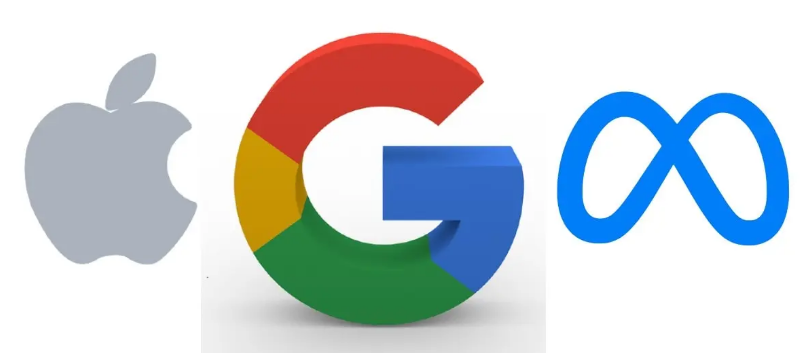 

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-apple-facebook-stock-price/AAPL.csv
/kaggle/input/google-apple-facebook-stock-price/GOOG.csv
/kaggle/input/google-apple-facebook-stock-price/META.csv


<h1 style="background-color:#d66057;font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">Import Libraries</h1>

In [24]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  

# Custom colors
class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'

<h1 style="background-color:#d66057;font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">Load the Data</h1>

In [25]:
# Loading data 
df_apple = pd.read_csv('../input/google-apple-facebook-stock-price/AAPL.csv')
df_google = pd.read_csv('../input/google-apple-facebook-stock-price/GOOG.csv')
df_fb = pd.read_csv('../input/google-apple-facebook-stock-price/META.csv')

print(clr.S+'Apple Stock Prices\n------------------'+clr.E)
display(df_apple.head())
print(clr.S+'Google Stock Prices\n-------------------'+clr.E)
display(df_google.head())
print(clr.S+'Facebook Stock Prices\n---------------------'+clr.E)
display(df_fb.head())

Apple Stock Prices
------------------


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,40.522499,40.560001,40.090000,40.314999,38.261566,87714000
1,2017-09-08,40.215000,40.287498,39.632500,39.657501,37.637562,114446000
2,2017-09-11,40.125000,40.512501,39.972500,40.375000,38.318501,126323200
3,2017-09-12,40.652500,40.990002,39.692501,40.215000,38.166664,286856000
4,2017-09-13,39.967499,39.990002,39.477501,39.912498,37.879570,179629600


Google Stock Prices
-------------------


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,46.586498,46.820499,46.181000,46.797501,46.797501,24254000
1,2017-09-08,46.824501,46.849499,46.243999,46.325001,46.325001,20230000
2,2017-09-11,46.712502,46.918999,46.346001,46.453999,46.453999,25340000
3,2017-09-12,46.629501,46.674000,46.193050,46.603500,46.603500,22688000
4,2017-09-13,46.533001,46.862499,46.493000,46.754501,46.754501,22052000


Facebook Stock Prices
---------------------


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-07,171.940002,173.309998,170.270004,173.210007,173.210007,18049500
1,2017-09-08,173.089996,173.490005,170.800003,170.949997,170.949997,10998500
2,2017-09-11,172.399994,173.889999,172.199997,173.509995,173.509995,12372000
3,2017-09-12,173.759995,174.000000,171.750000,172.960007,172.960007,11186300
4,2017-09-13,173.009995,173.169998,172.059998,173.050003,173.050003,9119300


**Open:** The price of the stock at the beginning of the trading day.

**High:** The highest price of the stock on a trading day.

**Low:** The lowest price of the stock on a trading day.

**Close:** The last price of the stock before the trading day ends.

**Volume:** The amount of the stocks that changes hands over the course of a day.

<h1 style="background-color:#d66057;font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">Data Analysis</h1>

In [26]:
# Check the Null and NA values
print(clr.S+'Apple stock prices\n'+clr.E)
print('Null values:', df_apple.isnull().values.sum())
print('NA values:', df_apple.isna().values.any())
print('---------------------\n')
print(clr.S+'Google stock prices\n'+clr.E)
print('Null values:', df_google.isnull().values.sum())
print('NA values:', df_google.isna().values.any())
print('---------------------\n')
print(clr.S+'Facebook stock prices\n'+clr.E)
print('Null values:', df_fb.isnull().values.sum())
print('NA values:', df_fb.isna().values.any())


Apple stock prices

Null values: 0
NA values: False
---------------------

Google stock prices

Null values: 0
NA values: False
---------------------

Facebook stock prices

Null values: 0
NA values: False


We will select from the dataset the **Open** column represents the starting price of the stock for a particular day.

In [27]:
# Create a new dataframe with "Date' and 'Open' columns only for each company
data_a = df_apple[['Date','Open']]
data_g = df_google[['Date','Open']]
data_f = df_fb[['Date','Open']]

print(clr.S+'Apple Stock OPEN Prices\n---------------------'+clr.E)
display(data_a.head())
print(clr.S+'Google Stock OPEN Prices\n---------------------'+clr.E)
display(data_g.head())
print(clr.S+'Facebook Stock OPEN Prices\n----------------------'+clr.E)
display(data_f.head())

Apple Stock OPEN Prices
---------------------


,Date,Open
0,2017-09-07,40.522499
1,2017-09-08,40.215000
2,2017-09-11,40.125000
3,2017-09-12,40.652500
4,2017-09-13,39.967499


Google Stock OPEN Prices
---------------------


,Date,Open
0,2017-09-07,46.586498
1,2017-09-08,46.824501
2,2017-09-11,46.712502
3,2017-09-12,46.629501
4,2017-09-13,46.533001


Facebook Stock OPEN Prices
----------------------


,Date,Open
0,2017-09-07,171.940002
1,2017-09-08,173.089996
2,2017-09-11,172.399994
3,2017-09-12,173.759995
4,2017-09-13,173.009995


In [28]:
# Merge multiple dataframes into one
df_merge = pd.merge(data_a,data_g,on = 'Date',how = 'left')
df_merge = pd.merge(df_merge,data_f,on = 'Date',how = 'left')
df_merge.columns = ['Date','APPL_Open','GOOG_Open','META_Open']
display(df_merge.head())
print(clr.S+'Total number of traiding days:'+clr.E,df_merge.shape[0])

,Date,APPL_Open,GOOG_Open,META_Open
0,2017-09-07,40.522499,46.586498,171.940002
1,2017-09-08,40.215000,46.824501,173.089996
2,2017-09-11,40.125000,46.712502,172.399994
3,2017-09-12,40.652500,46.629501,173.759995
4,2017-09-13,39.967499,46.533001,173.009995


Total number of traiding days: 1258


In [29]:
# Time series plot
plt.figure(figsize = (12,10))
fig = px.line(df_merge, x = df_merge['Date'], y = df_merge.columns)
fig.update_layout(
    title = 'Stock Open Prices of Apple, Google, and Facebook',                                         
    font_color = '#1B6091',
    title_font_color = 'red',    
    xaxis_title = 'Date',
    yaxis_title = 'Price',
    legend_title = 'Company',
    font = dict(family = 'Courier New, monospace', size=15)) 
fig.show();


<Figure size 864x720 with 0 Axes>

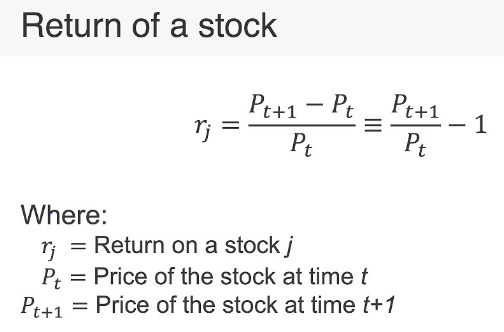

**Daily return** on a stock is used to measure the day to day performance of stocks, it is the price of stocks at today’s closure compared to the price of the same stock at yesterday’s closure. 

Positive daily return means appreciation in stock price on daily comparison.

Let's add the measure to our dataset using Pandas **pct_change()** method.

In [30]:
# Calculate daily return
df_merge['APPL_daily_return'] = df_merge.APPL_Open.pct_change(1) * 100 #for ONE DAY lookback
df_merge['GOOG_daily_return'] = df_merge.GOOG_Open.pct_change(1) * 100
df_merge['META_daily_return'] = df_merge.META_Open.pct_change(1) * 100
df_merge.head()

,Date,APPL_Open,GOOG_Open,META_Open,APPL_daily_return,GOOG_daily_return,META_daily_return
0,2017-09-07,40.522499,46.586498,171.940002,NaN,NaN,NaN
1,2017-09-08,40.215000,46.824501,173.089996,-0.758835,0.510884,0.668834
2,2017-09-11,40.125000,46.712502,172.399994,-0.223797,-0.239189,-0.398638
3,2017-09-12,40.652500,46.629501,173.759995,1.314642,-0.177685,0.788864
4,2017-09-13,39.967499,46.533001,173.009995,-1.685016,-0.206951,-0.431630


In [31]:
# Plot Daily returns
fig=make_subplots(specs = [[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x = df_merge['Date'],y = df_merge['APPL_daily_return'],name = 'Apple'))
fig.add_trace(go.Scatter(x = df_merge['Date'],y = df_merge['GOOG_daily_return'],name = 'Google'))
fig.add_trace(go.Scatter(x = df_merge['Date'],y = df_merge['META_daily_return'],name = 'Facebook'))
fig.update_layout(autosize = False, width = 1200, height = 800,
                  title_text = 'Daily Return',                                     
                  font_color = '#1B6091',
                  title_font_color = 'red',
                  legend_title = 'Company',
                  font = dict(family = 'Courier New, monospace', size=15))  
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Change price %')
fig.show()

The **NYSE** and **NASDAQ** average about 252 trading days a year. 

This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 4*5/7 (fixed date holidays) = 252.03 ≈ 252.

So, let's calculate **Yearly Growth** for each company and add it to our dataframe.

In [32]:
df_merge['APPL shift year'] = df_merge['APPL_Open'].shift(252) # the APPLE stock price one year back
df_merge['APPL Yearly Growth'] = (df_merge['APPL_Open'] - df_merge['APPL shift year']) * 100 / df_merge['APPL shift year']

df_merge['GOOG shift year'] = df_merge['GOOG_Open'].shift(252) # the Google stock price one year back
df_merge['GOOG Yearly Growth'] = (df_merge['GOOG_Open'] - df_merge['GOOG shift year']) * 100 / df_merge['GOOG shift year']

df_merge['META shift year'] = df_merge['META_Open'].shift(252) # the Facebook stock price one year back
df_merge['META Yearly Growth'] = (df_merge['META_Open'] - df_merge['META shift year']) * 100 / df_merge['META shift year']

df_merge

,Date,APPL_Open,GOOG_Open,META_Open,APPL_daily_return,GOOG_daily_return,META_daily_return,APPL shift year,APPL Yearly Growth,GOOG shift year,GOOG Yearly Growth,META shift year,META Yearly Growth
0,2017-09-07,40.522499,46.586498,171.940002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09-08,40.215000,46.824501,173.089996,-0.758835,0.510884,0.668834,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09-11,40.125000,46.712502,172.399994,-0.223797,-0.239189,-0.398638,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-09-12,40.652500,46.629501,173.759995,1.314642,-0.177685,0.788864,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-13,39.967499,46.533001,173.009995,-1.685016,-0.206951,-0.431630,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2022-08-30,162.130005,111.029999,160.350006,0.608136,0.225673,-0.192953,149.000000,8.812084,144.704498,-23.271218,372.559998,-56.959951
1254,2022-08-31,160.309998,111.629997,167.070007,-1.122560,0.540393,4.190833,152.660004,5.011132,145.884506,-23.480567,379.950012,-56.028424
1255,2022-09-01,156.639999,109.199997,163.580002,-2.289314,-2.176834,-2.088948,152.830002,2.492964,145.649994,-25.025746,379.589996,-56.906135
1256,2022-09-02,159.750000,111.339996,167.449997,1.985445,1.959706,2.365812,153.869995,3.821411,145.949493,-23.713338,381.500000,-56.107471


In [33]:
# Plot Yearly Growth
fig=make_subplots(specs = [[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x = df_merge['Date'][252:], y = df_merge['APPL Yearly Growth'][252:], name = 'Apple'))
fig.add_trace(go.Scatter(x = df_merge['Date'][252:], y = df_merge['GOOG Yearly Growth'][252:], name = 'Google'))
fig.add_trace(go.Scatter(x = df_merge['Date'][252:], y = df_merge['META Yearly Growth'][252:], name = 'Facebook'))

fig.update_layout(autosize = False, width = 1200,
                  height = 800, title_text = 'Yearly Growth', 
                  font_color ='#1B6091',
                  title_font_color ='red',
                  legend_title = 'Company',
                  font = dict(family = 'Courier New, monospace', size=15))
fig.update_xaxes(title_text = 'Date')
fig.update_yaxes(title_text = 'Yearly Growth %')
fig.show()

<h1 style="background-color:#d66057;font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">Compare two stocks</h1>

**R2**, or R-squared, is the relationship between two sets of data as determined by a number between 0 and 1.

The lower the number, the less relationship the two lines of data have; the higher the number, the greater the relationship. 

Let's evaluate two stocks using R2 that will tells us how strong the correlation is between the two.

In [34]:
# Create model
model = LinearRegression()
def modscore(x,y):
    R2 = model.score(x,y)
    return R2

df_a = pd.DataFrame(df_merge['APPL_Open'])
df_g = pd.DataFrame(df_merge['GOOG_Open'])
df_f = pd.DataFrame(df_merge['META_Open'])

In [35]:
# Fit model: Apple vs Google
model.fit(df_a, df_g).predict(df_a)
model.score(df_a, df_g)
score = modscore(df_a, df_g)
print(clr.S+'Apple vs Google: \n R2 = '+clr.E+str(round(score,4)))
print (clr.S+'----------------'+clr.E)

# Fit model: Apple vs Facebook
model.fit(df_a, df_f).predict(df_a)
model.score(df_a, df_f)
score1 = modscore(df_a,df_f)
print(clr.S+'Apple vs Facebook: \n R2 = '+clr.E+str(round(score1,4)))
print (clr.S+'----------------'+clr.E)

# Fit model: Google vs Facebook
model.fit(df_g, df_f).predict(df_g)
model.score(df_g, df_f)
score2 = modscore(df_g,df_f)
print(clr.S+'Google vs Facebook: \n R2 = '+clr.E+str(round(score2,4)))
print (clr.S+'----------------'+clr.E)

Apple vs Google: 
 R2 = 0.8986
----------------
Apple vs Facebook: 
 R2 = 0.4888
----------------
Google vs Facebook: 
 R2 = 0.5741
----------------


<h1 style="background-color:#d66057;font-family:Open Sans Light;font-size:250%;text-align:center;border-radius: 10px 10px;">👍 ❤️ If you find this notebook useful, I would appreciate an upvote! ❤️ 👍</h1>